# Visualisation study project

The goal is creating a complex graph that would look catchy for the purpose of an article/presentation, although not necessarily demonstrate any real trends, let alone any underlying causality, in the data used.

Data on exchange rates was used due to large number of datapoints (daily observations) readily available.

[Dataset utilised below](https://www.bis.org/statistics/xrusd.htm) was made available by the Bank for International Settlements. For the purpose of 'catchiness', USD:RUB exchange rates will be taken, marking periods under different US presidents (as a reiteration of dataquest main programme project) - and, on a separate graph, periods with clearly different trends.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv('WS_XRU_D_csv_row.csv')

C:\Users\Overmind\AppData\Local\Temp\ipykernel_20068\4264852960.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('WS_XRU_D_csv_row.csv')


In [3]:
data.head(10)

,Frequency,D:Daily,D:Daily.1,D:Daily.2,D:Daily.3,D:Daily.4,D:Daily.5,D:Daily.6,D:Daily.7,D:Daily.8,...,D:Daily.71,D:Daily.72,D:Daily.73,D:Daily.74,D:Daily.75,D:Daily.76,D:Daily.77,D:Daily.78,D:Daily.79,D:Daily.80
0,Reference area,AE:United Arab Emirates,AL:Albania,AR:Argentina,AT:Austria,AU:Australia,BA:Bosnia and Herzegovina,BE:Belgium,BG:Bulgaria,BH:Bahrain,...,TR:Turkey,TT:Trinidad and Tobago,TW:Chinese Taipei,UA:Ukraine,US:United States,UY:Uruguay,VE:Venezuela,XM:Euro area,XW:World,ZA:South Africa
1,Currency,AED:UAE dirham,ALL:Lek,ARS:Argentine peso,EUR:Euro,AUD:Australian dollar,BAM:Bosnian convertible mark,EUR:Euro,BGN:Lev,BHD:Bahraini dinar,...,TRY:Turkish lira,TTD:Trinidad and Tobago dollar,TWD:New Taiwan dollar,UAH:Hryvnia,USD:US dollar,UYU:Uruguayan peso,VEF:Bolivar,EUR:Euro,XDR:Special drawing right,ZAR:South African Rand
2,Collection,A:Average of observations through period,A:Average of observations through period,A:Average of observations through period,A:Average of observations through period,A:Average of observations through period,A:Average of observations through period,A:Average of observations through period,A:Average of observations through period,A:Average of observations through period,...,A:Average of observations through period,A:Average of observations through period,A:Average of observations through period,A:Average of observations through period,A:Average of observations through period,A:Average of observations through period,A:Average of observations through period,A:Average of observations through period,A:Average of observations through period,A:Average of observations through period
3,Unit Multiplier,0:Units,0:Units,0:Units,0:Units,0:Units,0:Units,0:Units,0:Units,0:Units,...,0:Units,0:Units,0:Units,0:Units,0:Units,0:Units,0:Units,0:Units,0:Units,0:Units
4,Decimals,6:Six,6:Six,16:Sixteen,6:Six,6:Six,6:Six,6:Six,6:Six,6:Six,...,16:Sixteen,6:Six,6:Six,6:Six,6:Six,6:Six,6:Six,6:Six,4:Four,6:Six
5,Availability,A:All users,A:All users,A:All users,A:All users,A:All users,A:All users,A:All users,A:All users,A:All users,...,A:All users,A:All users,A:All users,A:All users,A:All users,A:All users,A:All users,A:All users,A:All users,A:All users
6,Title,Exchange rates against USD United Arab Emirat...,Exchange rates against USD Albania - Lek - Da...,Exchange rates against USD Argentina - Argent...,Exchange rates against USD Austria - Euro - D...,Exchange rates against USD Australia - Austra...,Exchange rates against USD Bosnia and Herzego...,Exchange rates against USD Belgium - Euro - D...,Exchange rates against USD Bulgaria - Lev - D...,Exchange rates against USD Bahrain - Bahraini...,...,Exchange rates against USD Turkey - Turkish l...,Exchange rates against USD Trinidad and Tobag...,Exchange rates against USD Chinese Taipei - N...,Exchange rates against USD Ukraine - Hryvnia ...,Exchange rates against USD United States - US...,Exchange rates against USD Uruguay - Uruguaya...,Exchange rates against USD Venezuela - Boliva...,Exchange rates against USD Euro area - Euro -...,Exchange rates against USD World - Special dr...,Exchange rates against USD South Africa - Sou...
7,Time Period,D:AE:AED:A,D:AL:ALL:A,D:AR:ARS:A,D:AT:EUR:A,D:AU:AUD:A,D:BA:BAM:A,D:BE:EUR:A,D:BG:BGN:A,D:BH:BHD:A,...,D:TR:TRY:A,D:TT:TTD:A,D:TW:TWD:A,D:UA:UAH:A,D:US:USD:A,D:UY:UYU:A,D:VE:VEF:A,D:XM:EUR:A,D:XW:XDR:A,D:ZA:ZAR:A
8,1949-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
9,1949-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN


In [4]:
rub = data.loc[0].str.contains('Russia')
rub_ind = rub[rub == True].index

rub_data = pd.DataFrame()

rub_data['date'] = data['Frequency'].copy()
rub_data['rate'] = data[rub_ind]
rub_data = rub_data.iloc[8:].reset_index()
rub_data.head(10)

,index,date,rate
0,8,1949-01-03,NaN
1,9,1949-01-04,NaN
2,10,1949-01-05,NaN
3,11,1949-01-06,NaN
4,12,1949-01-07,NaN
5,13,1949-01-08,NaN
6,14,1949-01-09,NaN
7,15,1949-01-10,NaN
8,16,1949-01-11,NaN
9,17,1949-01-12,NaN


In [5]:
rub_data = rub_data[rub_data['rate'].isnull() == False].reset_index()
rub_data.head()

,level_0,index,date,rate
0,15885,15893,1992-07-01,0.12526
1,15886,15894,1992-07-02,0.12526
2,15887,15895,1992-07-03,0.1348
3,15890,15898,1992-07-06,0.1348
4,15891,15899,1992-07-07,0.1348


In [6]:
rub_data = rub_data.drop(columns = ['level_0', 'index'])
rub_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7746 entries, 0 to 7745
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    7746 non-null   object
 1   rate    7746 non-null   object
dtypes: object(2)
memory usage: 121.2+ KB


In [7]:
rub_data['date'] = pd.to_datetime(rub_data['date'])
rub_data['rate'] = rub_data['rate'].astype('float')
rub_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7746 entries, 0 to 7745
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    7746 non-null   datetime64[ns]
 1   rate    7746 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 121.2 KB


In [8]:
rub_data.tail()

,date,rate
7741,2022-08-30,60.3636
7742,2022-08-31,60.3677
7743,2022-09-01,60.2386
7744,2022-09-02,60.2370
7745,2022-09-03,60.3713


As a note, data is in USD:RUB format, i.e. 'one US dollar is valued as X rubles'.

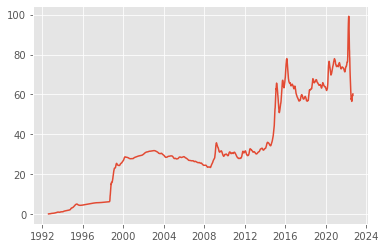

In [9]:
#picking rolling mean for proper visual smoothing

plt.style.use('ggplot')

rub_data['rate_mean_30'] = rub_data['rate'].rolling(30).mean()

plt.plot(rub_data['date'],
         rub_data['rate_mean_30'])
plt.show()

In [10]:
#simplified cutoff, as all inaugurations happened on January 20th, and we're looking at 30-day rolling means anyway

bush_h = rub_data.copy()[(rub_data['date'].dt.year < 1993)]
clinton = rub_data.copy()[(rub_data['date'].dt.year < 2001)
                             &(rub_data['date'].dt.year >= 1993)]
bush_w = rub_data.copy()[(rub_data['date'].dt.year < 2009)
                             &(rub_data['date'].dt.year >= 2001)]
obama = rub_data.copy()[(rub_data['date'].dt.year < 2017)
                             &(rub_data['date'].dt.year >= 2009)]
trump = rub_data.copy()[(rub_data['date'].dt.year < 2021)
                             &(rub_data['date'].dt.year >= 2017)]
biden = rub_data.copy()[(rub_data['date'].dt.year >= 2021)]

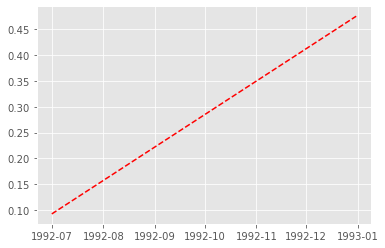

In [11]:
#attempting to plot a polynomial fit to show a clear trend line

import numpy as np
import matplotlib.dates as dates

#get values for the trend line analysis
bush_h_dates = bush_h['date']
bush_h_num = dates.date2num(bush_h_dates)

#calculate a fit line
bush_h_trend = np.polyfit(bush_h_num, bush_h['rate'], 1)
bush_h_fit = np.poly1d(bush_h_trend)

#general plot again
bush_h_x_fit = np.linspace(bush_h_num.min(), bush_h_num.max())
plt.plot(dates.num2date(bush_h_x_fit), bush_h_fit(bush_h_x_fit), "r--")
plt.show()

In [12]:
#note to self: attempt re-writing as a loop instead of 'replace all' copy-pasting

clinton_dates = clinton['date']
clinton_num = dates.date2num(clinton_dates)
clinton_trend = np.polyfit(clinton_num, clinton['rate'], 1)
clinton_fit = np.poly1d(clinton_trend)
clinton_x_fit = np.linspace(clinton_num.min(), clinton_num.max())

bush_w_dates = bush_w['date']
bush_w_num = dates.date2num(bush_w_dates)
bush_w_trend = np.polyfit(bush_w_num, bush_w['rate'], 1)
bush_w_fit = np.poly1d(bush_w_trend)
bush_w_x_fit = np.linspace(bush_w_num.min(), bush_w_num.max())

obama_dates = obama['date']
obama_num = dates.date2num(obama_dates)
obama_trend = np.polyfit(obama_num, obama['rate'], 1)
obama_fit = np.poly1d(obama_trend)
obama_x_fit = np.linspace(obama_num.min(), obama_num.max())

trump_dates = trump['date']
trump_num = dates.date2num(trump_dates)
trump_trend = np.polyfit(trump_num, trump['rate'], 1)
trump_fit = np.poly1d(trump_trend)
trump_x_fit = np.linspace(trump_num.min(), trump_num.max())

biden_dates = biden['date']
biden_num = dates.date2num(biden_dates)
biden_trend = np.polyfit(biden_num, biden['rate'], 1)
biden_fit = np.poly1d(biden_trend)
biden_x_fit = np.linspace(biden_num.min(), biden_num.max())

C:\Users\Overmind\AppData\Local\Temp\ipykernel_20068\1751755296.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['','1993','','1995','','1997','','1999','','2001'])
C:\Users\Overmind\AppData\Local\Temp\ipykernel_20068\1751755296.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(['','2001','','2003','','2005','','2007','','2009'])
C:\Users\Overmind\AppData\Local\Temp\ipykernel_20068\1751755296.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(['','2009','','2011','','2013','','2015','','2017'])
C:\Users\Overmind\AppData\Local\Temp\ipykernel_20068\1751755296.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.set_xticklabels(['2017','','2018','','2019','','2020','','2021',''])
C:\Users\Overmind\AppData\Local\Temp\ipykernel_20068\1751755296.py:67: UserWarning: FixedFormatter should only be us

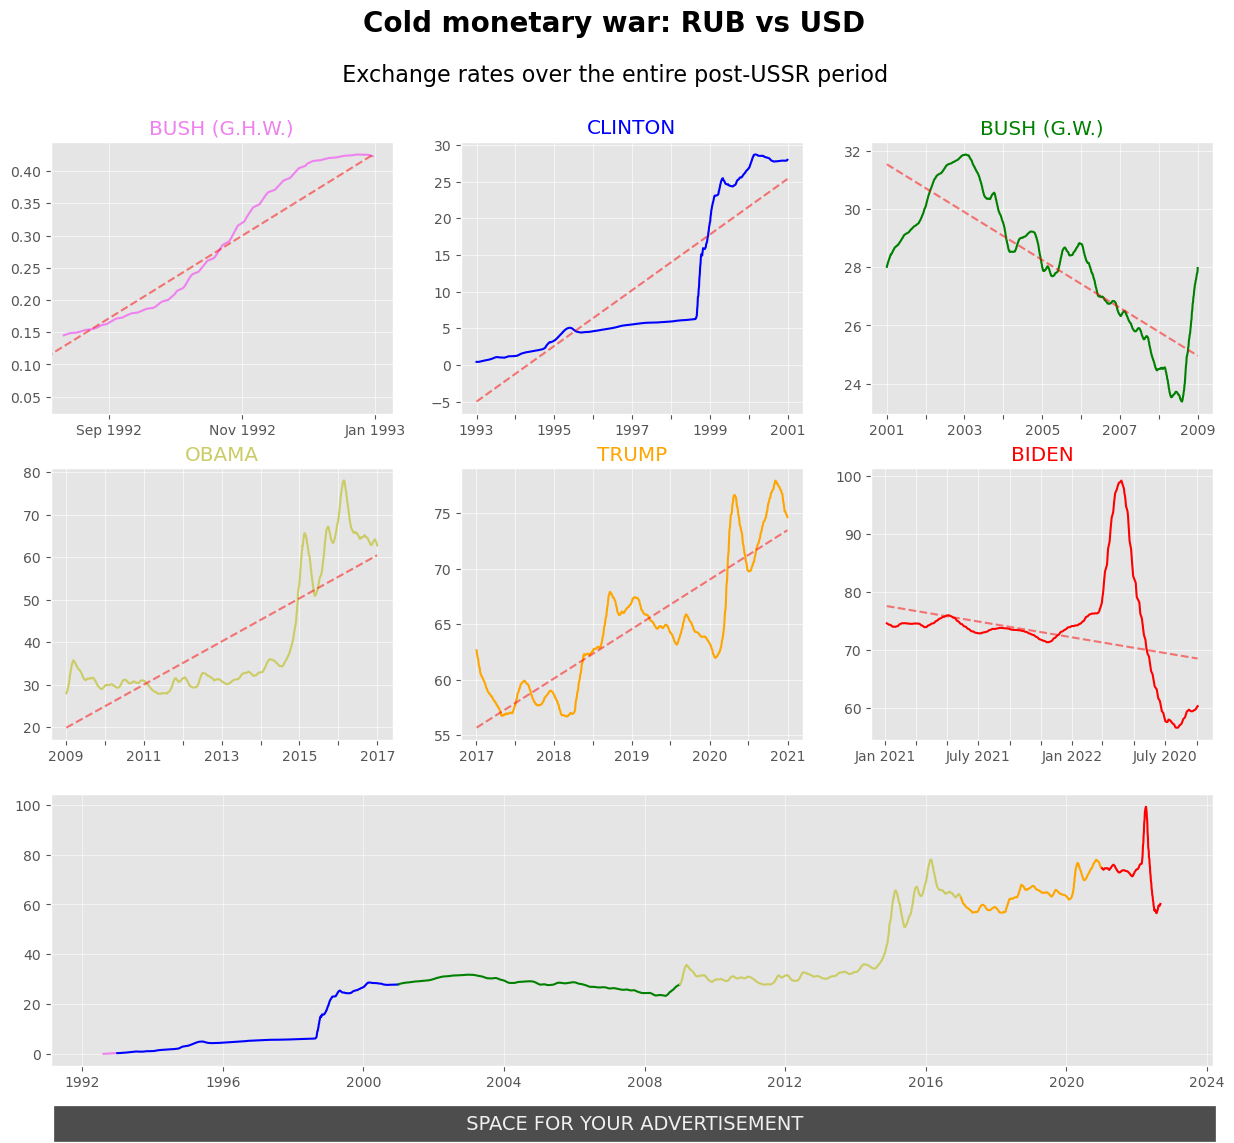

In [57]:
import datetime

plt.figure(figsize=(15, 12))
ax1 = plt.subplot(3,3,1)
ax2 = plt.subplot(3,3,2)
ax3 = plt.subplot(3,3,3)
ax4 = plt.subplot(3,3,4)
ax5 = plt.subplot(3,3,5)
ax6 = plt.subplot(3,3,6)

ax7 = plt.subplot(3,3,(7,9))

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7]

for ax in axes:
    ax.grid(alpha=0.6)

    
ax1.plot(bush_h['date'], bush_h['rate_mean_30'], color='violet')
ax1.plot(dates.num2date(bush_h_x_fit),
         bush_h_fit(bush_h_x_fit)-.05, #statistically wrong, delving into tech esoterics with casual readers is 
         "r--", alpha = 0.5)           #likely not productive though
ax1.set_title('BUSH (G.H.W.)',color='violet')
ax1.set_xlim(left = datetime.date(1992, 8, 5))

ax1.set_xticks([datetime.date(1992, 9, 1),datetime.date(1992, 11, 1),datetime.date(1993, 1, 1)])
ax1.set_xticklabels(['Sep 1992', 'Nov 1992', 'Jan 1993'])


ax2.plot(clinton['date'], clinton['rate_mean_30'], color='blue')
ax2.plot(dates.num2date(clinton_x_fit),
         clinton_fit(clinton_x_fit),
         "r--", alpha = 0.5)
ax2.set_title('CLINTON',color='blue')
ax2.set_xticklabels(['','1993','','1995','','1997','','1999','','2001'])


ax3.plot(bush_w['date'], bush_w['rate_mean_30'], color='green')
ax3.plot(dates.num2date(bush_w_x_fit),
         bush_w_fit(bush_w_x_fit),
         "r--", alpha = 0.5)
ax3.set_title('BUSH (G.W.)',color='green')
ax3.set_xticklabels(['','2001','','2003','','2005','','2007','','2009'])


ax4.plot(obama['date'], obama['rate_mean_30'], color='#CCCC66')
ax4.plot(dates.num2date(obama_x_fit),
         obama_fit(obama_x_fit),
         "r--", alpha = 0.5)
ax4.set_title('OBAMA',color='#CCCC66')
ax4.set_xticklabels(['','2009','','2011','','2013','','2015','','2017'])


ax5.plot(trump['date'], trump['rate_mean_30'], color='orange')
ax5.plot(dates.num2date(trump_x_fit),
         trump_fit(trump_x_fit),
         "r--", alpha = 0.5)
ax5.set_title('TRUMP',color='orange')
ax5.set_xticklabels(['2017','','2018','','2019','','2020','','2021',''])


ax6.plot(biden['date'], biden['rate_mean_30'], color='red')
ax6.plot(dates.num2date(biden_x_fit),
         biden_fit(biden_x_fit),
         "r--", alpha = 0.5)
ax6.set_title('BIDEN',color='red')
ax6.set_xticklabels(['Jan 2021','','','July 2021','','','Jan 2022','','','July 2022',''])


ax7.plot(bush_h['date'], bush_h['rate_mean_30'],
        color='violet')
ax7.plot(clinton['date'], clinton['rate_mean_30'],
        color='blue')
ax7.plot(bush_w['date'], bush_w['rate_mean_30'],
        color='green')
ax7.plot(obama['date'], obama['rate_mean_30'],
        color='#CCCC66')
ax7.plot(trump['date'], trump['rate_mean_30'],
        color='orange')
ax7.plot(biden['date'], biden['rate_mean_30'],
        color='red')
ax7.grid(alpha=0.5)


ax7.text(datetime.date(1991, 6, 1), -30, 66*' '+'SPACE FOR YOUR ADVERTISEMENT'+66*' ',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=14)

ax7.text(datetime.date(2000, 1, 1), 410, 'Cold monetary war: RUB vs USD',
         fontsize=20, weight='bold')
ax7.text(datetime.date(1999, 1, 1), 390, '''  Exchange rates over the entire post-USSR period''',
        fontsize=16)

plt.show()

Y-axis (exchange rate) has a significantly different scale between graphs, which makes them easier to see and read, but harder to compare. That said, overall graph may be used to deliver a message of continuous pressure on RUB, which was not the case for only two periods so far:
- during build-up to the Global financial crisis, when structural issues were being accumulated within US economy;
- amid hydrocarbons price fears before and during the war, with a major spike shortly after the invasion.

Building a second version of the graph below, this time separating into three periods clearly visible on the last plot:
- post-USSR stability and the Asian crisis hit;
- market economy and the Global financial crisis hit;
- neosoviet* economy, war and isolation.

*not a correct term scientifically, yet project goal required graph for a broad audience

In [58]:
postsoviet = rub_data.copy()[(rub_data['date'].dt.year < 2002)]
market = rub_data.copy()[(rub_data['date'].dt.year < 2014)
                             &(rub_data['date'].dt.year >= 2002)]
neosoviet = rub_data.copy()[(rub_data['date'].dt.year >= 2014)]

In [60]:
postsoviet_dates = postsoviet['date']
postsoviet_num = dates.date2num(postsoviet_dates)
postsoviet_trend = np.polyfit(postsoviet_num, postsoviet['rate'], 1)
postsoviet_fit = np.poly1d(postsoviet_trend)
postsoviet_x_fit = np.linspace(postsoviet_num.min(), postsoviet_num.max())

market_dates = market['date']
market_num = dates.date2num(market_dates)
market_trend = np.polyfit(market_num, market['rate'], 1)
market_fit = np.poly1d(market_trend)
market_x_fit = np.linspace(market_num.min(), market_num.max())

neosoviet_dates = neosoviet['date']
neosoviet_num = dates.date2num(neosoviet_dates)
neosoviet_trend = np.polyfit(neosoviet_num, neosoviet['rate'], 1)
neosoviet_fit = np.poly1d(neosoviet_trend)
neosoviet_x_fit = np.linspace(neosoviet_num.min(), neosoviet_num.max())

C:\Users\Overmind\AppData\Local\Temp\ipykernel_20068\4210904540.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['1992','','1994','','1996','','1998','','2000','','2002'])
C:\Users\Overmind\AppData\Local\Temp\ipykernel_20068\4210904540.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(['','2014','','2016','','2018','','2020','','2022',''])


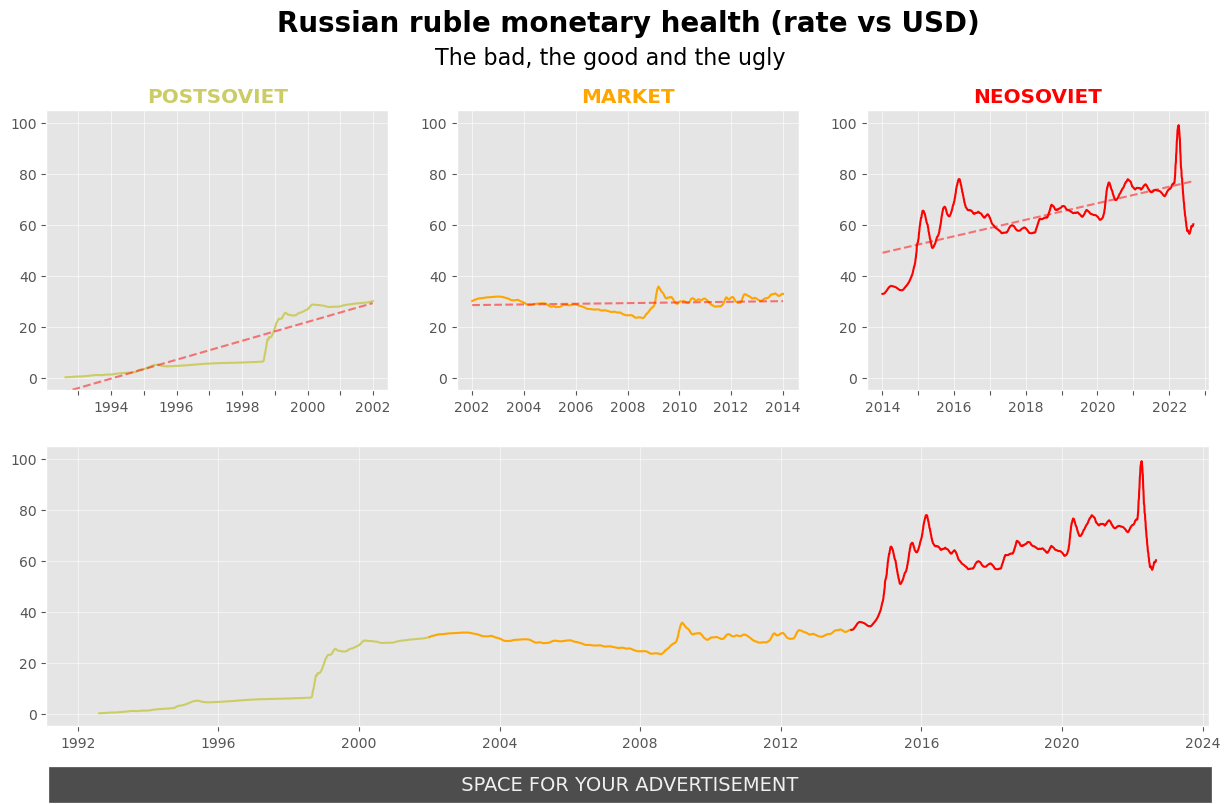

In [90]:
plt.figure(figsize=(15, 8))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.grid(alpha=0.6)
    ax.set_ylim(bottom = -5, top = 105)
    
ax1.plot(postsoviet['date'], postsoviet['rate_mean_30'], color='#CCCC66')
ax1.plot(dates.num2date(postsoviet_x_fit),
         postsoviet_fit(postsoviet_x_fit),
         "r--", alpha = 0.5)
ax1.set_title('POSTSOVIET',color='#CCCC66', weight = 'bold')
ax1.set_xticklabels(['1992','','1994','','1996','','1998','','2000','','2002'])


ax2.plot(market['date'], market['rate_mean_30'], color='orange')
ax2.plot(dates.num2date(market_x_fit),
         market_fit(market_x_fit),
         "r--", alpha = 0.5)
ax2.set_title('MARKET',color='orange', weight = 'bold')



ax3.plot(neosoviet['date'], neosoviet['rate_mean_30'], color='red')
ax3.plot(dates.num2date(neosoviet_x_fit),
         neosoviet_fit(neosoviet_x_fit),
         "r--", alpha = 0.5)
ax3.set_title('NEOSOVIET', color='red', weight = 'bold')
ax3.set_xticklabels(['','2014','','2016','','2018','','2020','','2022',''])


ax4.plot(postsoviet['date'], postsoviet['rate_mean_30'],
        color='#CCCC66')
ax4.plot(market['date'], market['rate_mean_30'],
        color='orange')
ax4.plot(neosoviet['date'], neosoviet['rate_mean_30'],
        color='red')
ax4.grid(alpha=0.5)


ax4.text(datetime.date(1991, 6, 1), -30, 66*' '+'SPACE FOR YOUR ADVERTISEMENT'+66*' ',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=14)

ax4.text(datetime.date(1997, 9, 1), 268, 'Russian ruble monetary health (rate vs USD)',
         fontsize=20, weight='bold')
ax4.text(datetime.date(2002, 3, 1), 255, 'The bad, the good and the ugly',
        fontsize=16)

plt.show()

Broader periods allowed for a shared y-axis on all graphs, making them comparable and clearly marking three periods.

I. Postsoviet
Relatively high but relatively stable inflation, especially after 1995 - yet the monetary system was severely impacted by the Asian crisis, with landslide devaluation and volatility in ensuing years.

II. Market
Relatively free-market oligarhic economy with a flexible exchange rate. Much more RUB day-to-day volatility, yet long term exchange rate remains remarkably stable, shaken far less by the spillovers from Global financial crisis.

III. Neosoviet
Starting in 2014 with Crimea, much increased volatility and the return of upwards trend are clearly visible.